# Telecom Churn prediction using machine Learning

https://www.kaggle.com/code/mt20cse008ayush/proactive-attrition-managment-logistic-regression 

In [1]:
# import packages :
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, precision_score, recall_score


from sklearn import metrics
import xgboost as xgb


# plt.style.use("seaborn-whitegrid")
import missingno as msno


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
data = pd.read_csv("cell2celltrain.csv")

# 1- Preprocessing task :

### a- Summary and basic information of the data :

In [4]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
data.shape

(51047, 58)

this dataset contains 51047 rows and 58 columns.

In [6]:
data.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [7]:
data.drop(columns="CustomerID", inplace=True)

### b - Replace null values and perform exploratory data analysis :

In [8]:
null_values = pd.DataFrame(data.isna().sum())
null_values.rename(columns={0:"count_nan"}, inplace=True)
null_values["count_nan"] = 100*(null_values["count_nan"]/data.shape[0])
null_values.sort_values(by="count_nan", ascending=False, inplace=True)
null_values.head(15)

,count_nan
AgeHH2,1.780712
AgeHH1,1.780712
PercChangeMinutes,0.718945
PercChangeRevenues,0.718945
MonthlyMinutes,0.305601
TotalRecurringCharge,0.305601
DirectorAssistedCalls,0.305601
OverageMinutes,0.305601
RoamingCalls,0.305601
MonthlyRevenue,0.305601


In [9]:
df_type = list()

for k in null_values.index[:14]:
    df_type.append((k, data[k].dtype))
    
df_type = pd.DataFrame(df_type)
df_type.rename(columns={0:"", 1:"dtype_col"}, inplace=True)
df_type.set_index("", inplace=True)
df_type.head(14)

,dtype_col
,
AgeHH2,float64
AgeHH1,float64
PercChangeMinutes,float64
PercChangeRevenues,float64
MonthlyMinutes,float64
TotalRecurringCharge,float64
DirectorAssistedCalls,float64
OverageMinutes,float64
RoamingCalls,float64


14 variables ont des valeurs manquantes.
mais le pourcentage de ces valeurs ne depasse pas 1.780712 %. qui sont de type float64 sauf la variable **ServiceArea**.

**imputation en utilisant arbre de décision :**

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Load the data
float_columns = [k for k in data.columns if data[k].dtype == "float64"]
df = data[float_columns]
df = df.dropna(axis=1)

for col in df_type.index:
    if data[col].dtype != "float64":
        continue
    
    print(col)
    
    df[col] = data[col]
    # Split the data into training and test sets
    X_train = df[df[col].notnull()].drop(col, axis=1)
    y_train = df[df[col].notnull()][col]
    X_test = df[df[col].isnull()].drop(col, axis=1)

    # Train a decision tree model on the training data
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Use the trained model to predict the missing values in the test set
    y_pred = model.predict(X_test)

    # Replace the null values in the original DataFrame with the predicted values
    df.loc[df[col].isnull(), col] = y_pred
    data[col] = df[col]

AgeHH2
AgeHH1
PercChangeMinutes
PercChangeRevenues
MonthlyMinutes
TotalRecurringCharge
DirectorAssistedCalls
OverageMinutes
RoamingCalls
MonthlyRevenue
CurrentEquipmentDays
Handsets
HandsetModels


In [11]:
null_values = pd.DataFrame(data.isna().sum())
null_values.rename(columns={0:"count_nan"}, inplace=True)
null_values["count_nan"] = 100*(null_values["count_nan"]/data.shape[0])
null_values.sort_values(by="count_nan", ascending=False, inplace=True)
null_values.head()

,count_nan
ServiceArea,0.047015
Churn,0.000000
HasCreditCard,0.000000
ChildrenInHH,0.000000
HandsetRefurbished,0.000000


In [12]:
data["ServiceArea"].describe()

count         51023
unique          747
top       NYCBRO917
freq           1684
Name: ServiceArea, dtype: object

In [13]:
# Sélectionner la colonne catégorielle contenant les valeurs manquantes
col = data["ServiceArea"]

# Trouver la valeur la plus fréquente dans la colonne
most_frequent_value = col.mode()[0]

# Remplacer les valeurs manquantes par la valeur la plus fréquente
data["ServiceArea"] = col.fillna(most_frequent_value)

In [14]:
null_values = pd.DataFrame(data.isna().sum())
null_values.rename(columns={0:"count_nan"}, inplace=True)
null_values["count_nan"] = 100*(null_values["count_nan"]/data.shape[0])
null_values.sort_values(by="count_nan", ascending=False, inplace=True)
null_values.head()

,count_nan
Churn,0.0
AgeHH1,0.0
ChildrenInHH,0.0
HandsetRefurbished,0.0
HandsetWebCapable,0.0


### L'Exploratory Data Analysis (EDA) :

C:\Users\hp\AppData\Local\Temp/ipykernel_10492/1381238465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = data["Churn"]


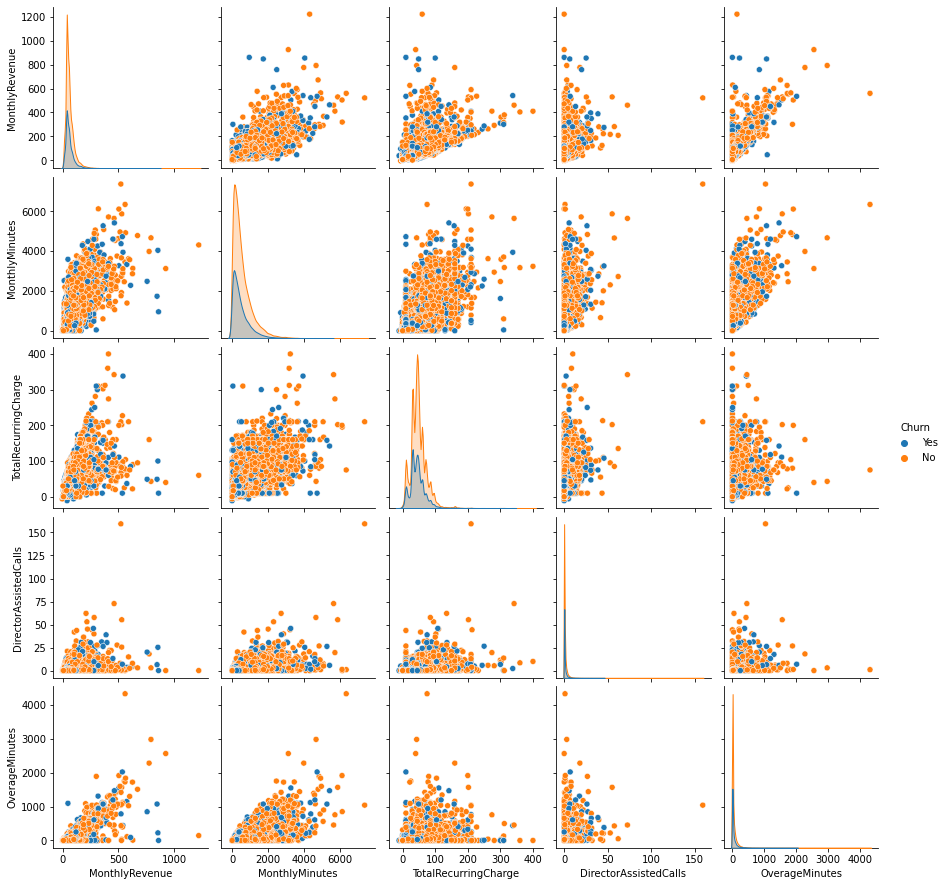

In [15]:
# Load the data
float_columns = [k for k in data.columns if data[k].dtype == "float64"]
df = data[float_columns[0:5]]
df["Churn"] = data["Churn"]

# Créer une matrice de plots à l'aide de la fonction pairplot de Seaborn
sns.pairplot(df, hue="Churn")

# Afficher la figure
plt.show()

il y a un problème de multi-colinearité entre les variables continues. ainsi que certaines variables sont skewed (non symétriques).

C:\Users\hp\AppData\Local\Temp/ipykernel_10492/2958472983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = data["Churn"]


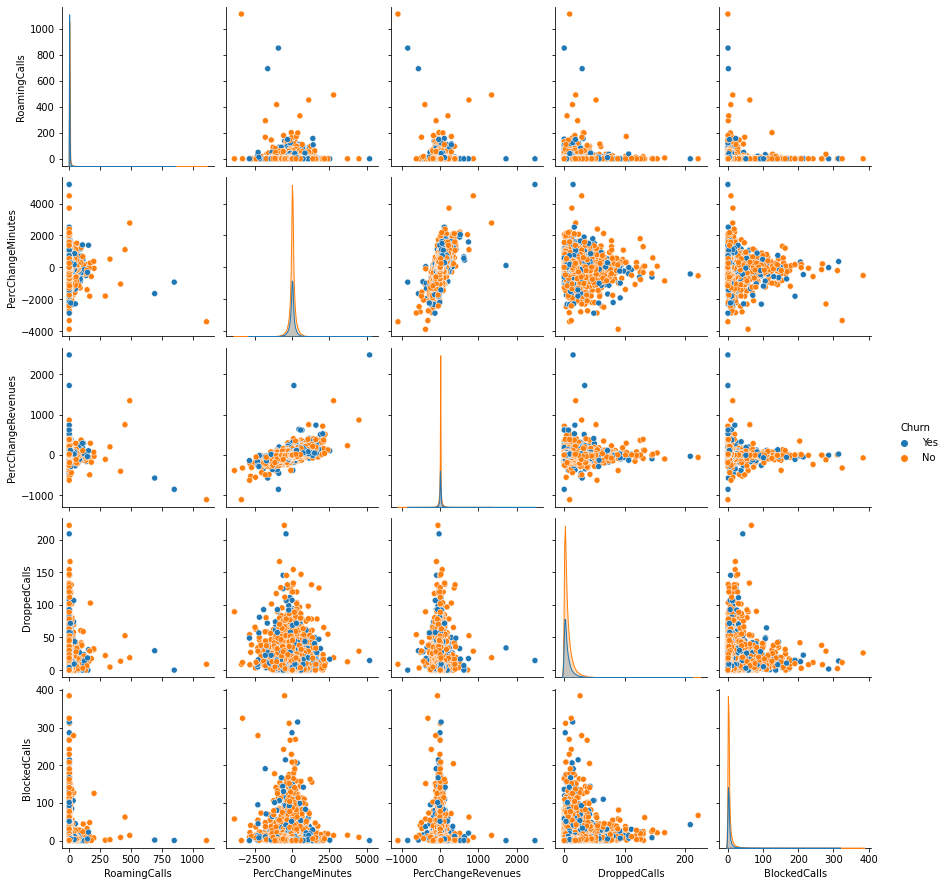

In [16]:
# Load the data
float_columns = [k for k in data.columns if data[k].dtype == "float64"]
df = data[float_columns[5:10]]
df["Churn"] = data["Churn"]

# Créer une matrice de plots à l'aide de la fonction pairplot de Seaborn
sns.pairplot(df, hue="Churn")

# Afficher la figure
plt.show()

il y a un problème de multi-colinearité entre les variables continues. ainsi que certaines variables sont skewed (non symétriques).

### c- Transform skewed variables, categorical and binary features:

La mesure de Galton est une autre méthode pour évaluer la symétrie d'une distribution de données. Elle consiste à calculer la proportion de valeurs de la distribution qui se trouvent à l'intérieur d'un intervalle autour de la médian.

In [17]:
col = "AgeHH2"

def meruse_Galto(data, col):
    # Calculer la médian de l'âge des passagers
    median = data[col].median()

    # Calculer l'intervalle autour de la médian (par exemple, +/- 20% de la médian)
    interval = 0.2 * median

    # Calculer la proportion de valeurs de l'âge des passagers qui se trouvent dans l'intervalle
    proportion = np.mean((data[col] >= median - interval) & (data[col] <= median + interval))
    return proportion

val = meruse_Galto(data, "AgeHH2")

print(f"La mesure de Galton de l'âge est de  : ", val)


La mesure de Galton de l'âge est de  :  0.5193057378494329


In [18]:
float_columns = [k for k in data.columns if data[k].dtype == "float64"]

list_skewed = list()

for k in float_columns:
    list_skewed.append((k, meruse_Galto(data, k)))
df_skewed = pd.DataFrame(list_skewed).sort_values(by=1, ascending=False)
df_skewed.rename(columns={0:"", 1:"mesure_Galton"}, inplace=True)
df_skewed.set_index("", inplace=True)
df_skewed

,mesure_Galton
,
CallForwardingCalls,0.995416
ThreewayCalls,0.727428
RoamingCalls,0.686465
HandsetModels,0.624562
Handsets,0.565224
CustomerCareCalls,0.548906
AgeHH2,0.519306
TotalRecurringCharge,0.373401
MonthlyRevenue,0.273728


In [19]:
df_skewed = df_skewed.head(10)
df_skewed

,mesure_Galton
,
CallForwardingCalls,0.995416
ThreewayCalls,0.727428
RoamingCalls,0.686465
HandsetModels,0.624562
Handsets,0.565224
CustomerCareCalls,0.548906
AgeHH2,0.519306
TotalRecurringCharge,0.373401
MonthlyRevenue,0.273728


**on va appliquer le Log pour resoudre ce problème de l'asymetrie**

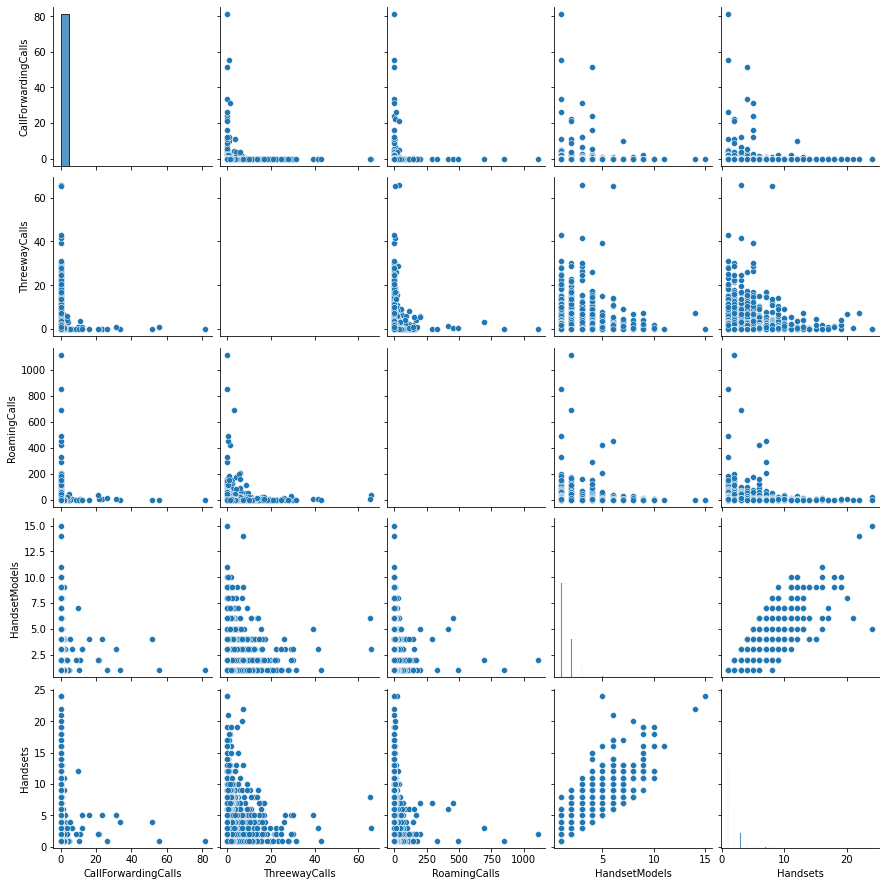

In [20]:
# Créer une matrice de plots à l'aide de la fonction pairplot de Seaborn
sns.pairplot(data[df_skewed.index[:5]])

# Afficher la figure
plt.show()

In [21]:
for col in df_skewed.index:

    # Transform the data
    data[col] = pd.DataFrame( (data[col] - data[col].mean()) / data[col].std())

In [22]:
float_columns = [k for k in data.columns if data[k].dtype == "float64"]

list_skewed = list()

for k in float_columns:
    list_skewed.append((k, meruse_Galto(data, k)))
df_skewed = pd.DataFrame(list_skewed).sort_values(by=1, ascending=False)
df_skewed.rename(columns={0:"", 1:"mesure_Galton"}, inplace=True)
df_skewed.set_index("", inplace=True)
df_skewed

,mesure_Galton
,
CurrentEquipmentDays,0.251122
MonthlyMinutes,0.148393
PeakCallsInOut,0.142398
DirectorAssistedCalls,0.132642
DroppedBlockedCalls,0.126628
UnansweredCalls,0.114463
OffPeakCallsInOut,0.106901
CallWaitingCalls,0.106314
OutboundCalls,0.104943


**categorical and binary features**

In [23]:
object_columns = [k for k in data.columns if data[k].dtype == "object"]
len(object_columns)

23

In [24]:
list_object = list()

for k in object_columns:
    list_object.append((k, len(data[k].unique())))
    
list_object = pd.DataFrame(list_object)
list_object.rename(columns={0:"", 1:"unique_values"}, inplace=True)
list_object.set_index("", inplace=True)
list_object.sort_values(by="unique_values", ascending=False, inplace=True)
list_object

,unique_values
,
ServiceArea,747
HandsetPrice,16
Occupation,8
CreditRating,7
PrizmCode,4
MaritalStatus,3
OwnsComputer,2
MadeCallToRetentionTeam,2
OwnsMotorcycle,2


In [25]:
ServiceArea_col = pd.DataFrame(data["ServiceArea"]).sort_values("ServiceArea")

ServiceArea_col = pd.DataFrame(ServiceArea_col["ServiceArea"].apply(lambda x : x[:6]))
ServiceArea_col = pd.DataFrame(ServiceArea_col["ServiceArea"].apply(lambda x : str(x)))

ServiceArea_col

,ServiceArea
27766,AIRAIK
41423,AIRAIK
35129,AIRAIK
26087,AIRAIK
37780,AIRAND
...,...
47931,VAHROA
47951,VAHROA
47921,VAHROA
47940,VAHSTA


In [26]:
len(list(set(ServiceArea_col["ServiceArea"])))

736

In [27]:
# data["ServiceArea"] = ServiceArea_col

In [28]:
len(ServiceArea_col["ServiceArea"].unique())

736

In [29]:
data.drop(columns="ServiceArea", inplace=True)

In [30]:
list_object = list()

for k in object_columns:
    if k == "ServiceArea":
        continue
    list_object.append((k, len(data[k].unique())))
    
list_object = pd.DataFrame(list_object)
list_object.rename(columns={0:"", 1:"unique_values"}, inplace=True)
list_object.set_index("", inplace=True)
list_object.sort_values(by="unique_values", ascending=False, inplace=True)
list_object.head(6)

,unique_values
,
HandsetPrice,16
Occupation,8
CreditRating,7
PrizmCode,4
MaritalStatus,3
ChildrenInHH,2


In [31]:
object_columns = [k for k in data.columns if data[k].dtype == "object"]


# Convert the categorical variable into dummy variables, and drop the first dummy column
df_nmric = pd.get_dummies(data, columns = object_columns, drop_first=True)

df_nmric = pd.DataFrame(df_nmric)
df_nmric.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,-0.782436,219.0,-1.041012,0.25,0.0,-0.125986,-157.0,-19.0,0.7,0.7,...,0,0,0,0,1,0,0,0,0,0
1,-0.939959,10.0,-1.250669,0.00,0.0,-0.125986,-4.0,0.0,0.3,0.0,...,0,0,0,0,1,0,0,0,0,1
2,-0.467841,8.0,-0.370111,0.00,0.0,-0.125986,-2.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
3,0.527178,1312.0,1.181349,1.24,0.0,-0.125986,157.0,8.1,52.0,7.7,...,0,0,0,1,0,0,0,0,0,0
4,-0.936588,0.0,-1.250669,0.00,0.0,-0.125986,0.0,-0.2,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [32]:
# df_nmric.to_csv("data_dummies.csv")

In [33]:
df_nmric = pd.read_csv("data_dummies.csv", index_col=0)

# 2- Selection features: use three methods for feature selection:

### a- Remove collinear features:

<AxesSubplot:>

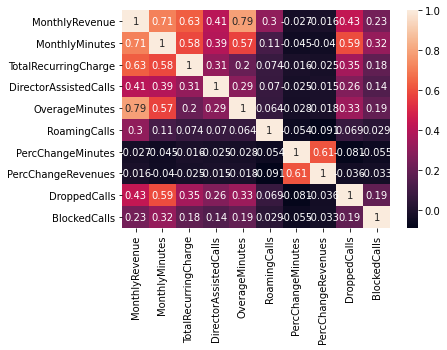

In [34]:
# Load the data
float_columns = [k for k in data.columns if data[k].dtype == "float64"]

# Calculer la matrice de corrélation
corr = data[float_columns[:10]].corr()

# Afficher la matrice de corrélation avec seaborn
sns.heatmap(corr, annot=True)


In [35]:
# Calculer la matrice de corrélation
corr = data[float_columns].corr()

df_corr = pd.DataFrame(corr)
df_corr.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2
MonthlyRevenue,1.000000,0.713130,0.630095,0.407591,0.787955,0.303383,-0.027210,-0.015948,0.431057,0.231890,...,0.642576,0.472768,0.417254,0.011390,0.468508,0.242945,0.236130,-0.217826,-0.107708,-0.103919
MonthlyMinutes,0.713130,1.000000,0.583925,0.392690,0.571860,0.112596,-0.044949,-0.039541,0.594624,0.317625,...,0.772669,0.765340,0.573385,0.018630,0.614383,0.302624,0.292936,-0.310738,-0.162396,-0.141496
TotalRecurringCharge,0.630095,0.583925,1.000000,0.311232,0.203211,0.073709,-0.016327,-0.025089,0.353258,0.178718,...,0.551950,0.368120,0.334074,0.014062,0.354433,0.234016,0.225514,-0.248811,-0.104915,-0.099333
DirectorAssistedCalls,0.407591,0.392690,0.311232,1.000000,0.287423,0.069884,-0.025374,-0.015183,0.264309,0.139576,...,0.419844,0.274328,0.252969,0.002301,0.304929,0.184863,0.172400,-0.120962,-0.057597,-0.056380
OverageMinutes,0.787955,0.571860,0.203211,0.287423,1.000000,0.064044,-0.028433,-0.018021,0.332530,0.190108,...,0.519224,0.391645,0.329466,0.003680,0.456308,0.143114,0.143699,-0.123754,-0.064968,-0.061133


**Dimensionality reduction (PCA)**

In [36]:
# scale features
y = df_nmric.Churn_Yes
Scaler = MinMaxScaler()
X = df_nmric.copy()
X.drop(columns = ['Churn_Yes'], inplace=True)
X = Scaler.fit_transform(X)

In [37]:
X.shape

(51047, 83)

Text(0, 0.5, 'Explained Variance Ratio')

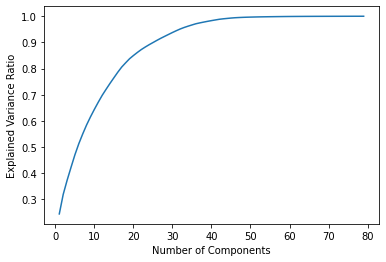

In [38]:
# plot the explained variance
X1 = X
var = []
for n in range(1, 80):
    pca = PCA(n_components = n)
    x = pca.fit_transform(X1)
    var.append(pca.explained_variance_ratio_.sum())

plt.plot(range(1, 80), var)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

In [39]:
# choose n = 26
pca = PCA(n_components = 40)
X1 = pca.fit_transform(X)
pca.explained_variance_ratio_.sum()

0.98325158602248

In [40]:
data = pd.DataFrame(X1)
data['Churn_Yes'] = df_nmric.Churn_Yes

In [41]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Churn_Yes
0,1.092218,0.886952,0.649297,0.625113,-0.690955,0.479730,-0.723480,-0.135980,0.285304,0.364740,...,-0.245815,0.028878,0.020532,-0.212104,-0.041737,0.019153,0.060297,-0.027720,0.295195,1
1,1.685675,0.947094,0.606527,0.251454,-0.861791,0.512745,0.004410,0.823631,-0.337749,0.110448,...,-0.140902,-0.046030,0.046692,-0.358273,-0.077880,0.024291,-0.033222,-0.085597,0.046256,1
2,0.303523,-0.087678,-0.154721,-1.143736,-0.014354,0.854877,0.353189,0.740095,-0.111185,-0.954105,...,-0.264481,0.028053,0.059564,-0.404129,-0.576917,0.125710,-0.032996,-0.038905,0.050310,0
3,0.373529,0.765622,0.048391,-0.295525,0.107979,-0.688454,-0.890519,0.743594,0.015686,0.395038,...,-0.248277,0.204330,0.071329,-0.334195,-0.069470,0.541126,0.172392,-0.017760,0.110957,0
4,1.556427,0.578310,0.623824,-0.120896,-0.036227,0.597022,-0.464919,-0.534434,-0.125469,0.186831,...,-0.070849,0.112010,0.060426,-0.185341,-0.093058,-0.015433,-0.072069,-0.055345,-0.105666,1


# 3- Make prediction using machine learning models: Logistic Regression, SVM, RF, XGboost :

## using PCA components :

In [44]:
Y = data['Churn_Yes']
X = data.drop(columns=['Churn_Yes'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [45]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (35732, 40)
Y train shape:  (35732,)
X test shape:  (15315, 40)
Y test shape:  (15315,)


**Logistic Regression**

In [46]:
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear')
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

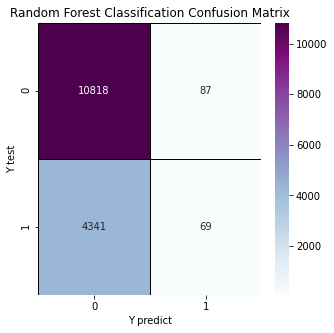

In [47]:
test_pred = lr.predict(X_test)
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, test_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [72]:
# Make predictions on the test set
predictions = lr.predict(X_test)

# Evaluate the model
accuracy = sum(predictions == Y_test) / len(Y_test)
print("Test set accuracy: {:.2f}".format(accuracy*100))

f1 = f1_score(predictions, Y_test)
print('F1 score:', f1*100)

precision = precision_score(predictions, Y_test)
print('precision_score:', precision*100)

recall = recall_score(predictions, Y_test)
print('recall :', recall*100)

Test set accuracy: 71.09
F1 score: 3.0223390275952697
precision_score: 1.5646258503401362
recall : 44.230769230769226


**Random Forest**

In [69]:
# Train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

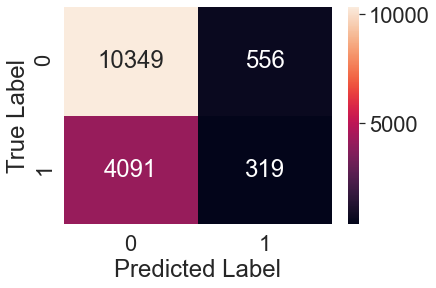

In [70]:
test_pred = model.predict(X_test)
cm_test = metrics.confusion_matrix(Y_test, test_pred)
sns.set(font_scale=2)
sns.heatmap(cm_test, annot = True, fmt = 'd');
plt.xlabel('Predicted Label');
plt.ylabel('True Label');

In [71]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = sum(predictions == Y_test) / len(Y_test)
print("Test set accuracy: {:.2f}".format(accuracy*100))

f1 = f1_score(predictions, Y_test)
print('F1 score:', f1*100)

precision = precision_score(predictions, Y_test)
print('precision_score:', precision*100)

recall = recall_score(predictions, Y_test)
print('recall :', recall*100)

Test set accuracy: 69.66
F1 score: 12.07190160832545
precision_score: 7.233560090702948
recall : 36.457142857142856


**XGBoost**

In [52]:

# Convert the data into an XGBoost-compatible format
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set up the XGBoost parameters
param = {
    "eta": 0.1,  # learning rate
    "max_depth": 5,  # maximum depth of each tree
    "objective": "binary:logistic",  # binary classification
    "subsample": 0.8,  # percentage of samples used per tree
    "colsample_bytree": 0.8,  # percentage of features used per tree
}

# Train the model
num_round = 100  # number of boosting rounds
bst = xgb.train(param, dtrain, num_round)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:53:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


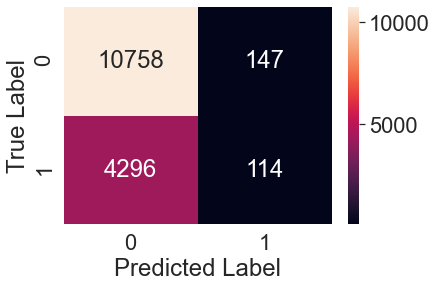

In [56]:
predictions = bst.predict(dtest)
test_pred = np.round(predictions)
cm_test = metrics.confusion_matrix(Y_test, test_pred)
sns.set(font_scale=2)
sns.heatmap(cm_test, annot = True, fmt = 'd');
plt.xlabel('Predicted Label');
plt.ylabel('True Label');

In [66]:
# Make predictions on the test set
predictions = bst.predict(dtest)
predictions = np.round(predictions)

# Evaluate the model
accuracy = sum(predictions == Y_test) / len(Y_test)
print("Test set accuracy: {:.2f}".format(accuracy*100))

f1 = f1_score(predictions, Y_test)
print('F1 score:', f1*100)

precision = precision_score(predictions, Y_test)
print('precision_score:', precision*100)

recall = recall_score(predictions, Y_test)
print('recall :', recall*100)

Test set accuracy: 70.99
F1 score: 4.881181759794476
precision_score: 2.585034013605442
recall : 43.67816091954023


# 4- Make prediction using machine learning models: Logistic Regression, SVM, RF, XGboost :

## using data dummies components :

In [79]:
df_nmric = pd.read_csv("data_dummies.csv", index_col=0)

In [81]:
# scale features
Y = df_nmric.Churn_Yes
X = df_nmric.copy()
X.drop(columns = ['Churn_Yes'], inplace=True)

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [83]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (35732, 83)
Y train shape:  (35732,)
X test shape:  (15315, 83)
Y test shape:  (15315,)


**Logistic regression**

In [93]:
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear')
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

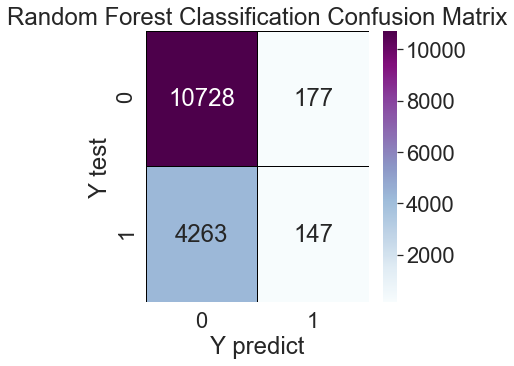

In [94]:
test_pred = lr.predict(X_test)
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, test_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [95]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = sum(predictions == Y_test) / len(Y_test)
print("Test set accuracy: {:.2f}".format(accuracy*100))

f1 = f1_score(predictions, Y_test)
print('F1 score:', f1*100)

precision = precision_score(predictions, Y_test)
print('precision_score:', precision*100)

recall = recall_score(predictions, Y_test)
print('recall :', recall*100)

Test set accuracy: 72.08
F1 score: 14.990059642147116
precision_score: 8.54875283446712
recall : 60.806451612903224


**XGboost**

In [87]:
# Convert the data into an XGBoost-compatible format
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set up the XGBoost parameters
param = {
    "eta": 0.1,  # learning rate
    "max_depth": 5,  # maximum depth of each tree
    "objective": "binary:logistic",  # binary classification
    "subsample": 0.8,  # percentage of samples used per tree
    "colsample_bytree": 0.8,  # percentage of features used per tree
}

# Train the model
num_round = 100  # number of boosting rounds
bst = xgb.train(param, dtrain, num_round)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:18:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


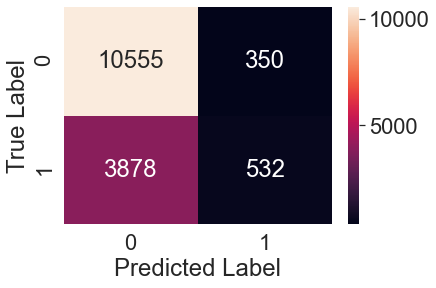

In [88]:
predictions = bst.predict(dtest)
test_pred = np.round(predictions)
cm_test = metrics.confusion_matrix(Y_test, test_pred)
sns.set(font_scale=2)
sns.heatmap(cm_test, annot = True, fmt = 'd');
plt.xlabel('Predicted Label');
plt.ylabel('True Label');

In [89]:
# Make predictions on the test set
predictions = bst.predict(dtest)
predictions = np.round(predictions)

# Evaluate the model
accuracy = sum(predictions == Y_test) / len(Y_test)
print("Test set accuracy: {:.2f}".format(accuracy*100))

f1 = f1_score(predictions, Y_test)
print('F1 score:', f1*100)

precision = precision_score(predictions, Y_test)
print('precision_score:', precision*100)

recall = recall_score(predictions, Y_test)
print('recall :', recall*100)

Test set accuracy: 72.39
F1 score: 20.105820105820104
precision_score: 12.063492063492063
recall : 60.317460317460316


**Random Forest**

In [90]:
# Train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestClassifier()

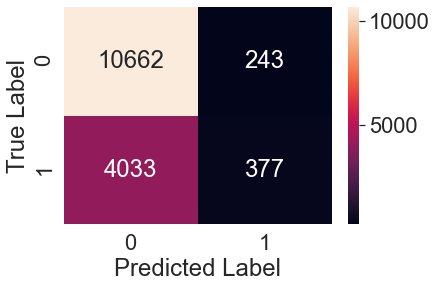

In [91]:
test_pred = model.predict(X_test)
cm_test = metrics.confusion_matrix(Y_test, test_pred)
sns.set(font_scale=2)
sns.heatmap(cm_test, annot = True, fmt = 'd');
plt.xlabel('Predicted Label');
plt.ylabel('True Label');

In [92]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = sum(predictions == Y_test) / len(Y_test)
print("Test set accuracy: {:.2f}".format(accuracy*100))

f1 = f1_score(predictions, Y_test)
print('F1 score:', f1*100)

precision = precision_score(predictions, Y_test)
print('precision_score:', precision*100)

recall = recall_score(predictions, Y_test)
print('recall :', recall*100)

Test set accuracy: 72.08
F1 score: 14.990059642147116
precision_score: 8.54875283446712
recall : 60.806451612903224
